In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [5]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

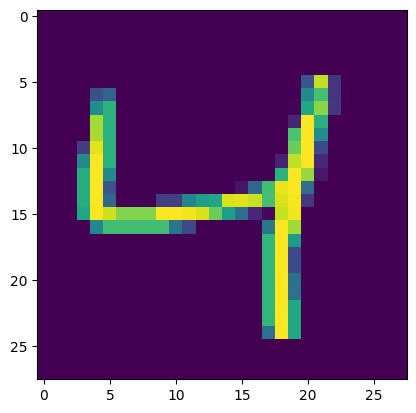

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2])

In [9]:
x_train = x_train/255
x_test = x_test/255

In [10]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
model = Sequential()

model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [17]:
history = model.fit(x_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 13s 8ms/step - loss: 0.2808 - accuracy: 0.9187 - val_loss: 0.1433 - val_accuracy: 0.9589
Epoch 2/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1169 - accuracy: 0.9655 - val_loss: 0.1215 - val_accuracy: 0.9628
Epoch 3/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0834 - accuracy: 0.9744 - val_loss: 0.0977 - val_accuracy: 0.9707
Epoch 4/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0615 - accuracy: 0.9808 - val_loss: 0.0919 - val_accuracy: 0.9718
Epoch 5/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0488 - accuracy: 0.9845 - val_loss: 0.1042 - val_accuracy: 0.9698
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0376 - accuracy: 0.9879 - val_loss: 0.0867 - val_accuracy: 0.9743
Epoch 7/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0320 - accuracy: 0.9896 - val_loss: 0.0875 - val_accuracy

In [18]:
y_prob = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [21]:
y_pred = y_prob.argmax(axis=1)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9788

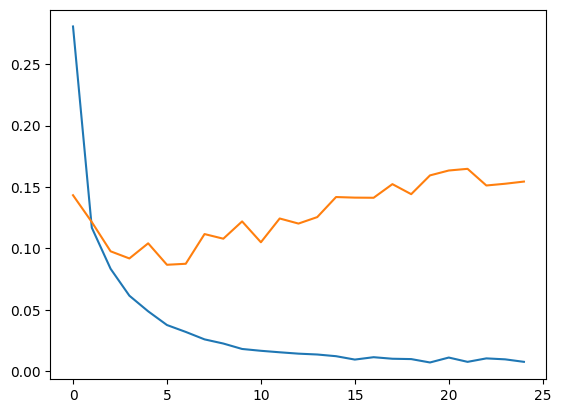

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

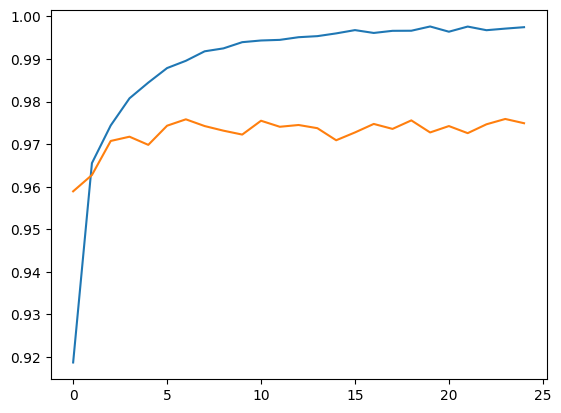

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

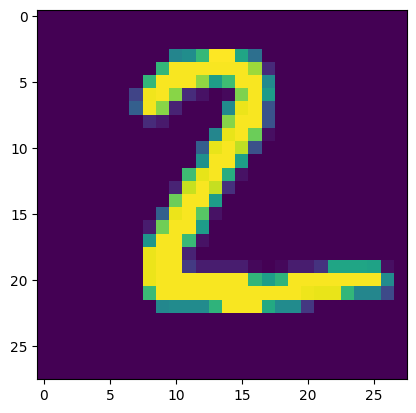

In [28]:
plt.imshow(x_test[1])

In [30]:
model.predict(x_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 36ms/step


array([2])